In [1]:
pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.6/dist-packages (0.7)


In [2]:
%matplotlib inline
%load_ext fortranmagic
%reload_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [3]:
assert ran_the_first_cell, "Oh noes!"

In [4]:
assert ran_the_first_cell, "xd"

In [5]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [6]:
lista = [4, 2.0, 6.2, "uno", "dos"]
lista

[4, 2.0, 6.2, 'uno', 'dos']

In [7]:
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [8]:
primero = lista[0]
segundo = lista[1]
print("primero:", primero)
print("segundo:", segundo)

primero: 4
segundo: 2.0


In [9]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [10]:
ultimo = lista[-1]
penultimo = lista[-2]
print("ultimo:", ultimo)
print("antes de el ultimo:", penultimo)

ultimo: dos
antes de el ultimo: uno


In [11]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [12]:
sublista = lista[2:5]
sublista

[6.2, 'uno', 'dos']

In [13]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [14]:
prim_dos = lista[:2]
prim_dos

[4, 2.0]

In [15]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [16]:
desp_dos = lista[2:]
desp_dos

[6.2, 'uno', 'dos']

In [17]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [18]:
lista = ['i', 'j', 'k', 'l', 'm', 'n', 'o','p']
lista[0:6:3]

['i', 'l']

In [19]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [20]:
lista[::-1]

['p', 'o', 'n', 'm', 'l', 'k', 'j', 'i']

In [21]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [22]:
lista = [6, 7, 8, 9, 0]
print("Antes", lista)
lista.append('Nuevo')
print("Despues:", lista)

Antes [6, 7, 8, 9, 0]
Despues: [6, 7, 8, 9, 0, 'Nuevo']


In [23]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [24]:
l = [6, 7, 8, 9, 0]
[x * 3 for x in lista]

[18, 21, 24, 27, 0, 'NuevoNuevoNuevo']

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [25]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [26]:
nombres = {'David': 'Cortes', 'Camilo': 'Salazar', 'Juan': 'Reyes'}
nombres

{'Camilo': 'Salazar', 'David': 'Cortes', 'Juan': 'Reyes'}

In [27]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [28]:
nombres['Raul'] = 'Perez'
nombres

{'Camilo': 'Salazar', 'David': 'Cortes', 'Juan': 'Reyes', 'Raul': 'Perez'}

In [29]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [30]:
del nombres['David']
nombres

{'Camilo': 'Salazar', 'Juan': 'Reyes', 'Raul': 'Perez'}

In [31]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

In [32]:
nombres['Bertrand':'Cortes']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [33]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [34]:
A = [[2, 4, 6],
     [8, 10, 12],
     [14, 16, 18],
     [0, 0, 0]]

B = [[3, 6, 9, 12],
     [15, 18, 21, 24]]

In [35]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [36]:
def matmul2(A, B):
    r_out = len(A)
    c_out = len(B[0])
    output = [[0 for col in range(c_out)] for row in range(r_out)]
    
    for i in range(r_out):
        for j in range(c_out):
            for k in range(len(B)):
                output[i][j] += A[i][k] * B[k][j]
    return output

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [37]:
%%time

matmul(a, b)

CPU times: user 92 µs, sys: 0 ns, total: 92 µs
Wall time: 120 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [38]:
%%time

matmul2(A, B)

CPU times: user 33 µs, sys: 6 µs, total: 39 µs
Wall time: 42.2 µs


[[66, 84, 102, 120], [174, 228, 282, 336], [282, 372, 462, 552], [0, 0, 0, 0]]

In [39]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.25394644447107684, 0.422576924973474, 0.6810696348042582],
 [0.8483658441722807, 0.9082908963663568, 0.38486216933667394]]

In [40]:
import random
def random_matrix2(m, n):
    output = []
    for row in range(m):
        output.append([random.random() for _ in range(n)])
    return output

rand = random_matrix2(3, 2)
rand

[[0.5354132333217388, 0.19408889843502397],
 [0.7781797245445632, 0.2692003459800969],
 [0.5214830753949652, 0.21418267946527203]]

In [41]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 6.9 s, sys: 13.6 ms, total: 6.92 s
Wall time: 6.94 s


In [42]:
%%time
randa1 = random_matrix2(500, 200)
randb1 = random_matrix2(200, 500)
x2 = matmul2(randa1, randb1)

CPU times: user 9.66 s, sys: 19.9 ms, total: 9.68 s
Wall time: 9.71 s


In [43]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [44]:
def producto_punto(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [45]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [46]:
%%fortran
subroutine fortran_producto_punto(xs, ys, resultado)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: resultado
    
    resultado = sum(xs * ys)
end

In [47]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [48]:
lista_datos = [float(i) for i in range(10000)]
array_datos = np.array(lista_datos)

In [49]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 10.3 ms, sys: 0 ns, total: 10.3 ms
Wall time: 11.1 ms


333328333350000.0

In [50]:
%%time
producto_punto(lista_datos, lista_datos)

CPU times: user 1.38 ms, sys: 0 ns, total: 1.38 ms
Wall time: 1.53 ms


333283335000.0

In [51]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 192 µs, sys: 5 µs, total: 197 µs
Wall time: 215 µs


333328333350000.0

In [52]:
%%time
fortran_producto_punto(array_datos, array_datos)

CPU times: user 32 µs, sys: 0 ns, total: 32 µs
Wall time: 36.5 µs


333283335000.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [53]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [54]:
def mul_elemwise2(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise2([5, 6, 7, 8], [5, 6 + 0j, 7.0, 'ocho'])

[25, (36+0j), 49.0, 'ochoochoochoochoochoochoochoocho']

In [55]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [56]:
codigo = 'a * b - c'
B_codigo = compile(codigo, '', 'eval')
import dis; dis.dis(B_codigo)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 BINARY_MULTIPLY
              6 LOAD_NAME                2 (c)
              8 BINARY_SUBTRACT
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [57]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [58]:
datos = np.array([5, 6, 7, 8])
datos

array([5, 6, 7, 8])

In [59]:
data + data

array([2, 4, 6, 8])

In [60]:
datos + datos

array([10, 12, 14, 16])

In [61]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 231 µs, sys: 908 µs, total: 1.14 ms
Wall time: 1.28 ms


333328333350000.0

In [62]:
%%time
(array_datos * array_datos).sum()

CPU times: user 107 µs, sys: 3 µs, total: 110 µs
Wall time: 116 µs


333283335000.0

In [63]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.64 ms, sys: 2.05 ms, total: 4.69 ms
Wall time: 4.78 ms


333328333350000.0

In [64]:
%%time
array_datos.dot(array_datos)

CPU times: user 127 µs, sys: 4 µs, total: 131 µs
Wall time: 81.8 µs


333283335000.0

In [65]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 370 µs, sys: 11 µs, total: 381 µs
Wall time: 195 µs


333328333350000.0

In [66]:
%%time
fortran_producto_punto(array_datos, array_datos)

CPU times: user 63 µs, sys: 2 µs, total: 65 µs
Wall time: 35.5 µs


333283335000.0

In [67]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [68]:
datos[0] = ".___."

ValueError: ignored

In [69]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [70]:
datos.append(2)

AttributeError: ignored

In [71]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [72]:
dosxdos = datos.reshape(2, 2)
dosxdos

array([[5, 6],
       [7, 8]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [73]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [74]:
array = np.array([7, 8, 9, 0, 1, 2], dtype='int16').reshape(2, 3)
print("Array:\n", array, sep='')
print("===========")
print("Data type:", array.dtype)
print("Data Shape:", array.shape)
print("Data Strides:", array.strides)
print("Datos:", array.data.tobytes())

Array:
[[7 8 9]
 [0 1 2]]
Data type: int16
Data Shape: (2, 3)
Data Strides: (6, 2)
Datos: b'\x07\x00\x08\x00\t\x00\x00\x00\x01\x00\x02\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [75]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [76]:
datos = np.arange(15).reshape(3, 5)
datos

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [77]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [78]:
datos * datos

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [79]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [80]:
np.sqrt(datos)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [81]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [82]:
(datos % 5) == 0

array([[ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False]])

In [83]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [84]:
((datos % 3) == 0) & ((datos % 4) == 0)

array([[ True, False, False, False, False],
       [False, False, False, False, False],
       [False, False,  True, False, False]])

In [85]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [86]:
datos @ datos.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [87]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [88]:
seno = np.sin(np.linspace(0, 3.14, 10))
coseno = np.cos(np.linspace(0, 3.14, 10))
seno

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [89]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [90]:
coseno[0]

1.0

In [91]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [92]:
coseno[:4]

array([1.        , 0.93975313, 0.76627189, 0.50045969])

In [93]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [94]:
coseno[4:]

array([ 0.17434523, -0.17277674, -0.4990802 , -0.76524761, -0.93920748,
       -0.99999873])

In [95]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [96]:
coseno[::1]

array([ 1.        ,  0.93975313,  0.76627189,  0.50045969,  0.17434523,
       -0.17277674, -0.4990802 , -0.76524761, -0.93920748, -0.99999873])

In [97]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [98]:
print("coseno:\n", coseno)
print("coseno > 0.8:\n", coseno > 0.8)
print("coseno[coseno > 0.8]:\n", coseno[coseno > 0.8])

coseno:
 [ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]
coseno > 0.8:
 [ True  True False False False False False False False False]
coseno[coseno > 0.8]:
 [1.         0.93975313]


In [99]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [100]:
print(coseno)
coseno[[0, 5, 8]]

[ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]


array([ 1.        , -0.17277674, -0.93920748])

In [101]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [102]:
datos_desorden = np.array([5, 1, 4, 7, 18, -6, 3])

In [103]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [104]:
orden_indices = np.argsort(datos_desorden)
orden_indices

array([5, 1, 6, 2, 0, 3, 4])

In [105]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [106]:
datos_desorden[orden_indices]

array([-6,  1,  3,  4,  5,  7, 18])

In [107]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [108]:
mc = np.array([12, 6, 10, 5, 6])
ast = np.array(['F', 'G', 'H', 'I', 'J'])

In [109]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [110]:
orden_por_mcap = np.argsort(mc)
ast[orden_por_mcap]

array(['I', 'G', 'J', 'H', 'F'], dtype='<U1')

In [111]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [112]:
print("fechas:\n", repr(event_dates))
print("Valor:\n", repr(event_values))
print("Calendario:\n", repr(calendar))

fechas:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Valor:
 array([10, 15, 20])
Calendario:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [113]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [114]:
print("R_Date:", event_dates)
print("In:", calendar.searchsorted(event_dates))
print("F-F Dates:", calendar[calendar.searchsorted(event_dates)])

R_Date: ['2017-01-06' '2017-01-07' '2017-01-08']
In: [3 4 4]
F-F Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [115]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [116]:
datos = np.arange(25).reshape(5, 5)
datos

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [117]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [118]:
datos[:3, :3]

array([[ 0,  1,  2],
       [ 5,  6,  7],
       [10, 11, 12]])

In [119]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [120]:
datos[:3, [1, -1]]

array([[ 1,  4],
       [ 6,  9],
       [11, 14]])

In [121]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [122]:
datos[(datos[:, 1] % 3) == 0]

array([[ 5,  6,  7,  8,  9],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [123]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [124]:
def variance2(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [125]:
variance(np.random.standard_normal(1000))

0.9832025425575498

In [126]:
variance2(np.random.standard_normal(100))

1.1748382784950622

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [127]:
data = np.arange(30)
data.mean()

14.5

In [128]:
datos = np.arange(20)
datos.mean()

9.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [129]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [130]:
datos = np.arange(30).reshape(3, 10)
datos

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [131]:
data.mean()

14.5

In [132]:
datos.mean()

14.5

In [133]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [134]:
datos.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [135]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [136]:
datos.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [137]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [138]:
dir = np.array([5, 7, 8, 9])
columna = np.array([[2], [3], [1]])
print("dir:\n", dir, sep='')
print("Columna:\n", columna, sep='')

dir:
[5 7 8 9]
Columna:
[[2]
 [3]
 [1]]


In [139]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [140]:
dir + columna

array([[ 7,  9, 10, 11],
       [ 8, 10, 11, 12],
       [ 6,  8,  9, 10]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [141]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [142]:
print("D:\n", datos, sep='')
print("M:\n", datos.mean(axis=0), sep='')
print("D - M:\n", datos - datos.mean(axis=0), sep='')

D:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
M:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
D - M:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [143]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [144]:
s2 = pd.Series(index=['f', 'g', 'h', 'i', 'j'], data=[6, 7, 8, 9, 10])
s2

f     6
g     7
h     8
i     9
j    10
dtype: int64

In [145]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [146]:
print("indice:", s2.index)
print("valor:", s2.values)

indice: Index(['f', 'g', 'h', 'i', 'j'], dtype='object')
valor: [ 6  7  8  9 10]


In [147]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [148]:
s2.iloc[0]

6

In [149]:
# ... or by label.
s.loc['a']

1

In [150]:
s2.loc['h']

8

In [151]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [152]:
s2.iloc[:3]

f    6
g    7
h    8
dtype: int64

In [153]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [154]:
s2.loc[:'i']

f    6
g    7
h    8
i    9
dtype: int64

In [155]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [156]:
s2.iloc[[2, -1]]

h     8
j    10
dtype: int64

In [157]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [158]:
s2.loc[s2 > 3]

f     6
g     7
h     8
i     9
j    10
dtype: int64

In [159]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [160]:
other_s2 = pd.Series({'v': 15.0, 'b': 30.0, 'n': 4.0, 'm': 0.0})
other_s2

v    15.0
b    30.0
n     4.0
m     0.0
dtype: float64

In [161]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [162]:
s2 + other_s2

b   NaN
f   NaN
g   NaN
h   NaN
i   NaN
j   NaN
m   NaN
n   NaN
v   NaN
dtype: float64

In [163]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [164]:
(s2 + other_s2).fillna(0.0)

b    0.0
f    0.0
g    0.0
h    0.0
i    0.0
j    0.0
m    0.0
n    0.0
v    0.0
dtype: float64

In [166]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [167]:
aaplxd = pd.read_csv('/AAPL.csv', parse_dates=['Date'], index_col='Date')
aaplxd.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [168]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [169]:
aaplxd.iloc[:1, :3]

,Adj Close,Close,High
Date,,,
2010-01-04,27.613066,30.572857,30.642857


In [170]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [171]:
aaplxd.loc[pd.Timestamp('2010-03-05'):pd.Timestamp('2010-03-07'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-03-05,31.278572,224905100.0


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

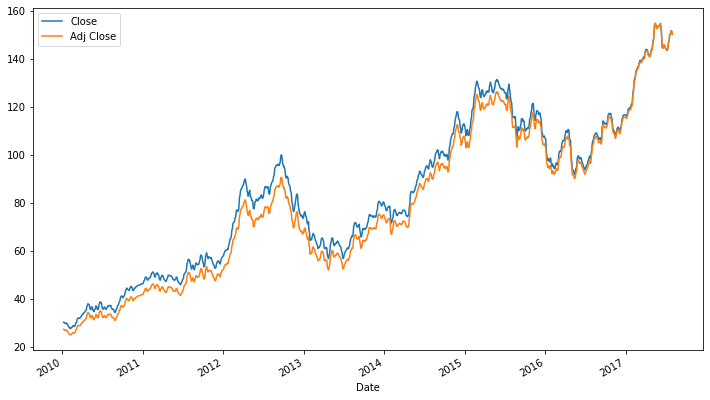

In [172]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

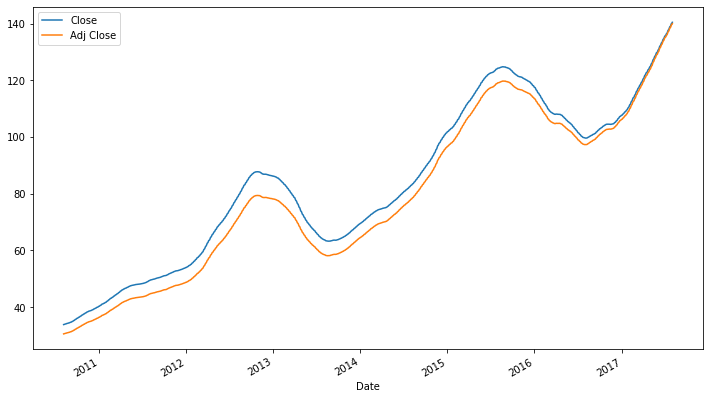

In [173]:
aaplxd.rolling(150)[['Close', 'Adj Close']].mean().plot();

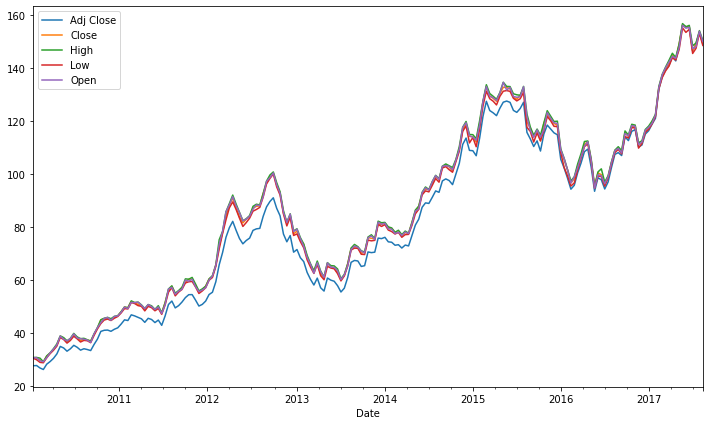

In [174]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

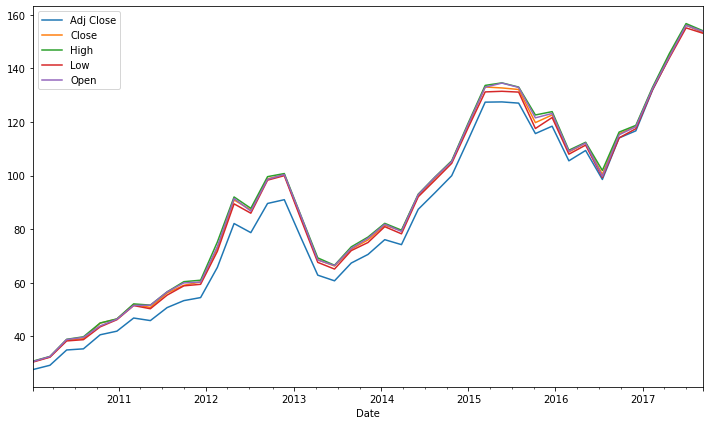

In [175]:
aaplxd.drop('Volume', axis=1).resample('10W').max().plot();

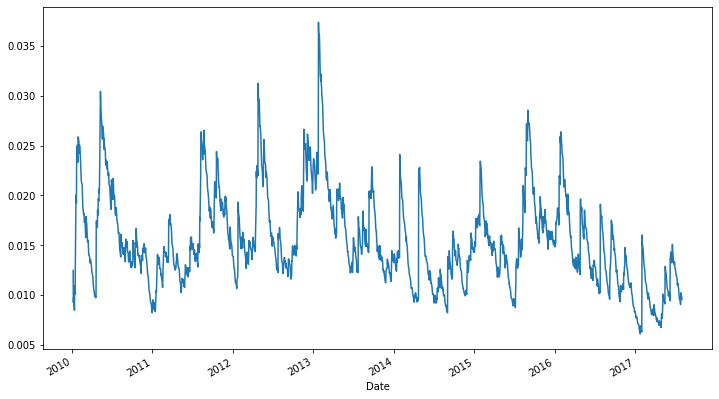

In [176]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

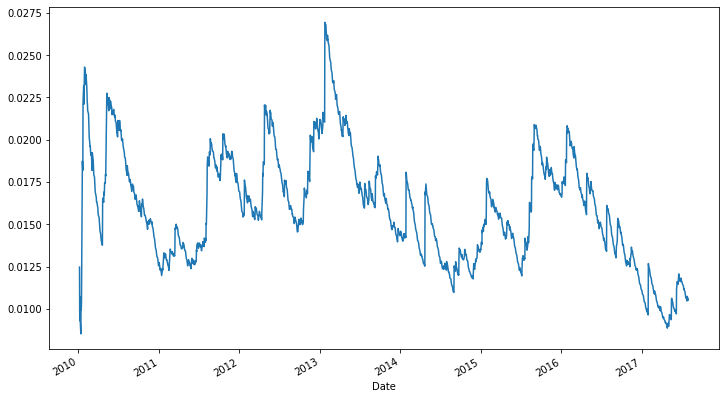

In [177]:
aaplxd['Close'].pct_change().ewm(span=100).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!